In [1]:
from IPython.display import display, HTML
display(HTML('<style>.container {width: 99% !important}</style>'))

# 1.0 Recebendo os dados

## 1.1 Importe das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kstest, zscore

## 1.2 Montagem do DataFrame principal

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')

In [4]:
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 1.3 Observar o describe do DataFrame

In [5]:
df.describe(percentiles=[0.05, 0.15, 0.25, 0.45, 0.5, 0.65, 0.75, 0.9, 0.99]).T

,count,mean,std,min,5%,15%,25%,45%,50%,65%,75%,90%,99%,max
car_ID,205.0,103.000000,59.322565,1.00,11.20,31.60,52.00,92.800,103.00,133.60,154.00,184.600,202.960,205.00
symboling,205.0,0.834146,1.245307,-2.00,-1.00,0.00,0.00,0.800,1.00,1.00,2.00,3.000,3.000,3.00
wheelbase,205.0,98.756585,6.021776,86.60,93.02,93.70,94.50,96.500,97.00,99.10,102.40,107.900,115.544,120.90
carlength,205.0,174.049268,12.337289,141.10,157.14,158.98,166.30,172.000,173.20,176.72,183.10,188.800,202.480,208.10
carwidth,205.0,65.907805,2.145204,60.30,63.60,63.80,64.10,65.400,65.50,66.50,66.90,68.640,71.700,72.30
carheight,205.0,53.724878,2.443522,47.80,49.70,50.80,52.00,53.500,54.10,54.86,55.50,56.620,59.100,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,1901.00,1998.00,2145.00,2385.000,2414.00,2712.40,2935.00,3230.000,3948.000,4066.00
enginesize,205.0,126.907317,41.642693,61.00,90.00,92.00,97.00,110.000,120.00,130.00,141.00,181.000,302.160,326.00
boreratio,205.0,3.329756,0.270844,2.54,2.97,3.03,3.15,3.270,3.31,3.46,3.58,3.672,3.800,3.94
stroke,205.0,3.255415,0.313597,2.07,2.64,3.03,3.11,3.255,3.29,3.40,3.41,3.540,3.900,4.17


In [6]:
print(*df.columns, sep=', ')

car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 1.4 Estudo das variáveis

| Variável         | Tipo de dado | Descrição                                                            |
|------------------|--------------|----------------------------------------------------------------------|
| car_ID           | Integer      | Numero de identificacao unico do carro                               |
| symboling        | Integer      | categorizacao do risco de sinistro (-3 seguro até 3 perigoso)        |
| CarName          | String       | Nome do fabricante e do modelo do carro.                             |
| fueltype         | String       | Tipo de combustível                                                  |
| aspiration       | String       | Sobrealimentação (turbo, supercharger ou aspirado)                   |
| doornumber       | String       | Número de portas                                                     |
| carbody          | String       | Tipo de carroceria                                                   |
| drivewheel       | String       | Distribuição da tração                                               |
| enginelocation   | String       | Localização do motor                                                 |
| wheelbase        | Float        | Distância entre eixos                                                |
| carlength        | Float        | Comprimento do carro                                                 |
| carwidth         | Float        | Largura do carro                                                     |
| carheight        | Float        | Altura do carro                                                      |
| curbweight       | Float        | Peso do carro com o tanque cheio e acessórios padrão                 |
| enginetype       | String       | Tipo de motor                                                        |
| cylindernumber   | String       | Quantidade de cilindros                                              |
| enginesize       | Integer      | Tamanho do motor                                                     |
| fuelsystem       | String       | Sistema de alimentação de combustível                                |
| boreratio        | Float        | Razão entre o diâmetro do cilindro e curso de deslocamento do pistão |
| stroke           | Float        | Curso de deslocamento do pistão                                      |
| compressionratio | Float        | Razão de compressão do motor                                         |
| horsepower       | Integer      | Potência em cavalos do motor                                         |
| peakrpm          | Integer      | Rotação máxima do motor                                              |
| citympg          | Integer      | Consumo na cidade                                                    |
| highwaympg       | Integer      | Consumo na rodovia                                                   |
| price            | Float        | TARGET: Preço do carro                                               |

# 2.0 Analisando os dados

## 2.1 Analisando as variáveis numéricas

### 2.1.1 Analisando variáveis categóriacas que podem ser numéricas

In [8]:
var_cat_num = tuple('doornumber cylindernumber'.split())

val_uniq = list()

for variable in var_cat_num:
    uniq_tup = tuple(df[variable].unique())
    val_uniq.append((variable, len(uniq_tup), uniq_tup))

print(*val_uniq, sep='\n')

('doornumber', 2, ('two', 'four'))
('cylindernumber', 7, ('four', 'six', 'five', 'three', 'twelve', 'two', 'eight'))


As duas variáveis possuem valores categóricos, mas podem ser traduzidos em números.
Podemos fazer um mapping para sanar este problema antes de plotarmos os gráficos.

In [9]:
#Mudando os valores string por valores numéricos

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'three': 3,
                                                 'twelve': 12, 'two': 2, 'eight': 8})

In [10]:
df[list(var_cat_num)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   doornumber      205 non-null    int64
 1   cylindernumber  205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


### 2.1.2 Definindo as variáveis como numéricas ou categóricas.

In [11]:
cat = 'category'
df = df.astype({
    'car_ID': cat,    
    'CarName': cat,
    'fueltype': cat,
    'aspiration': cat,    
    'carbody': cat,
    'drivewheel': cat,
    'enginelocation': cat,    
    'enginetype': cat,    
    'fuelsystem': cat,    
})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    category
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    int64   
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    int64   
 16  enginesize        205 non-

### 2.1.3 Plotando histogramas das variáveis numéricas.

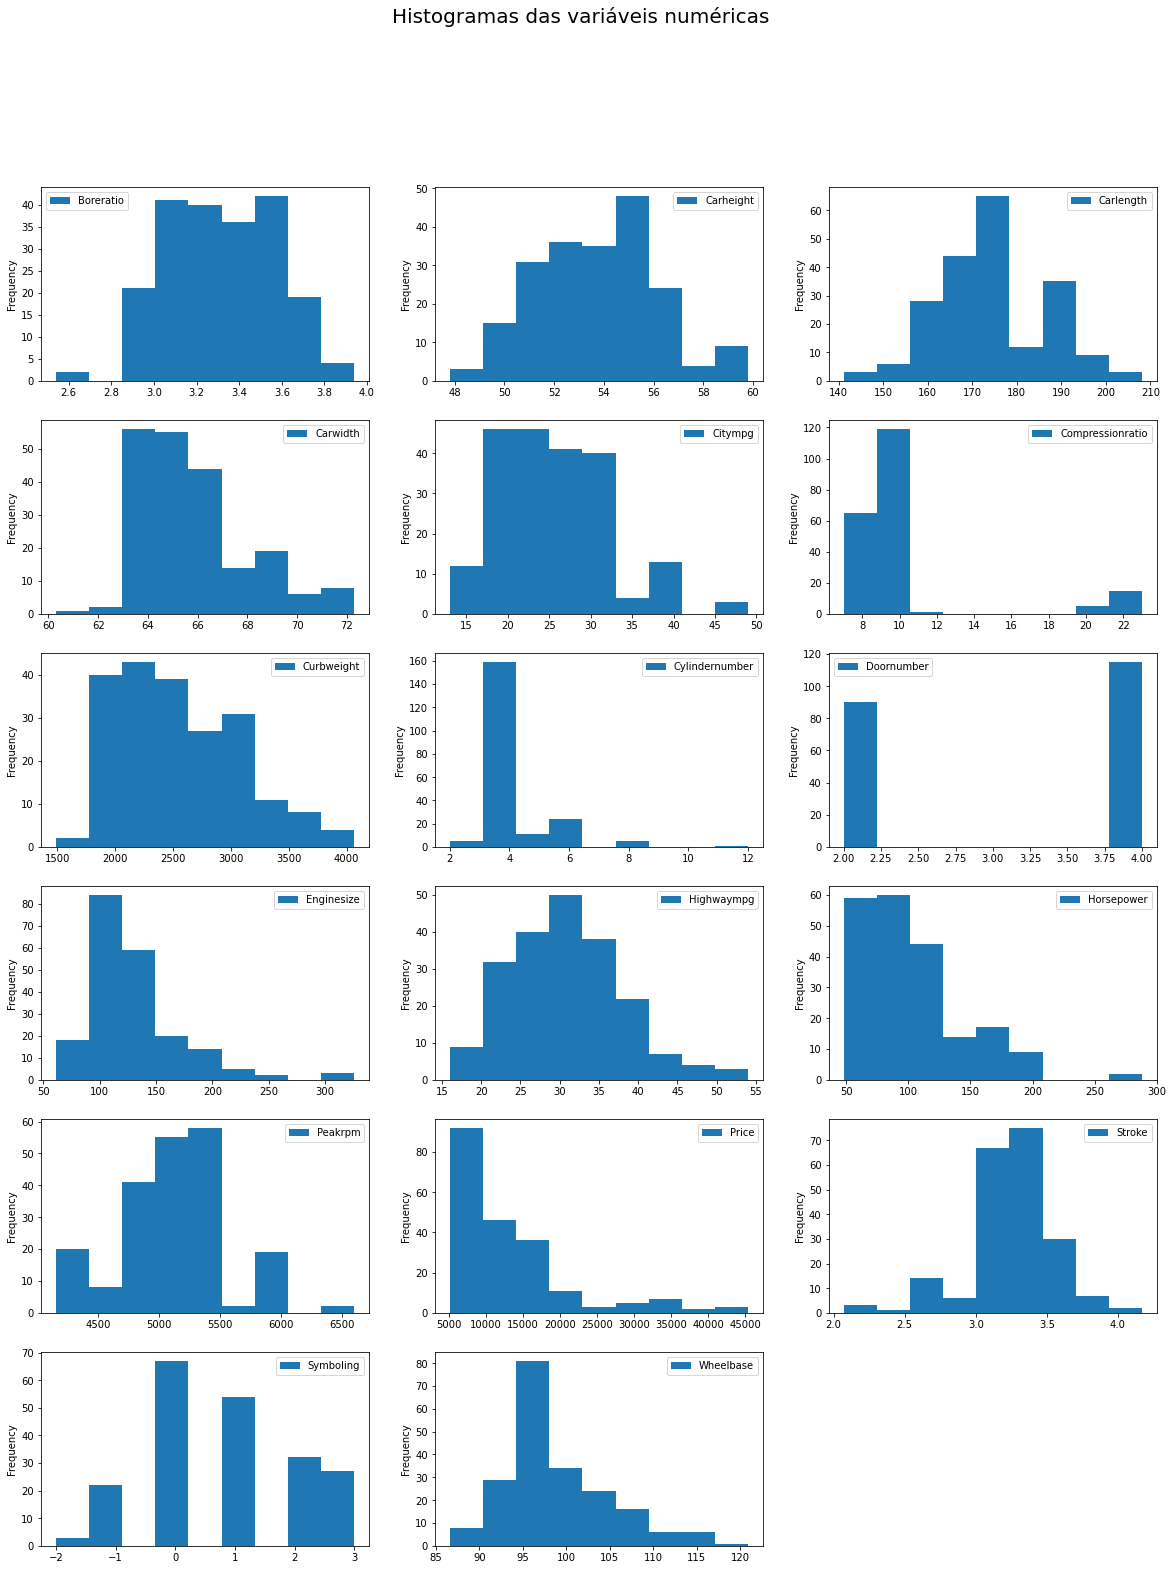

In [13]:
numeric_vars = sorted(tuple(df.select_dtypes(include='number').columns))[::-1]

nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 25))

fig.suptitle('Histogramas das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            df[numeric_vars[nv_index]].plot.hist(bins=9, 
            label=numeric_vars[nv_index].replace('_', ' ').title(), 
            subplots=True, legend=True, ax=axes[linha, coluna])
      
            nv_index -= 1

        else:
            plt.axis('off')


plt.show()

### 2.1.4 Boxplot das variáveis numéricas

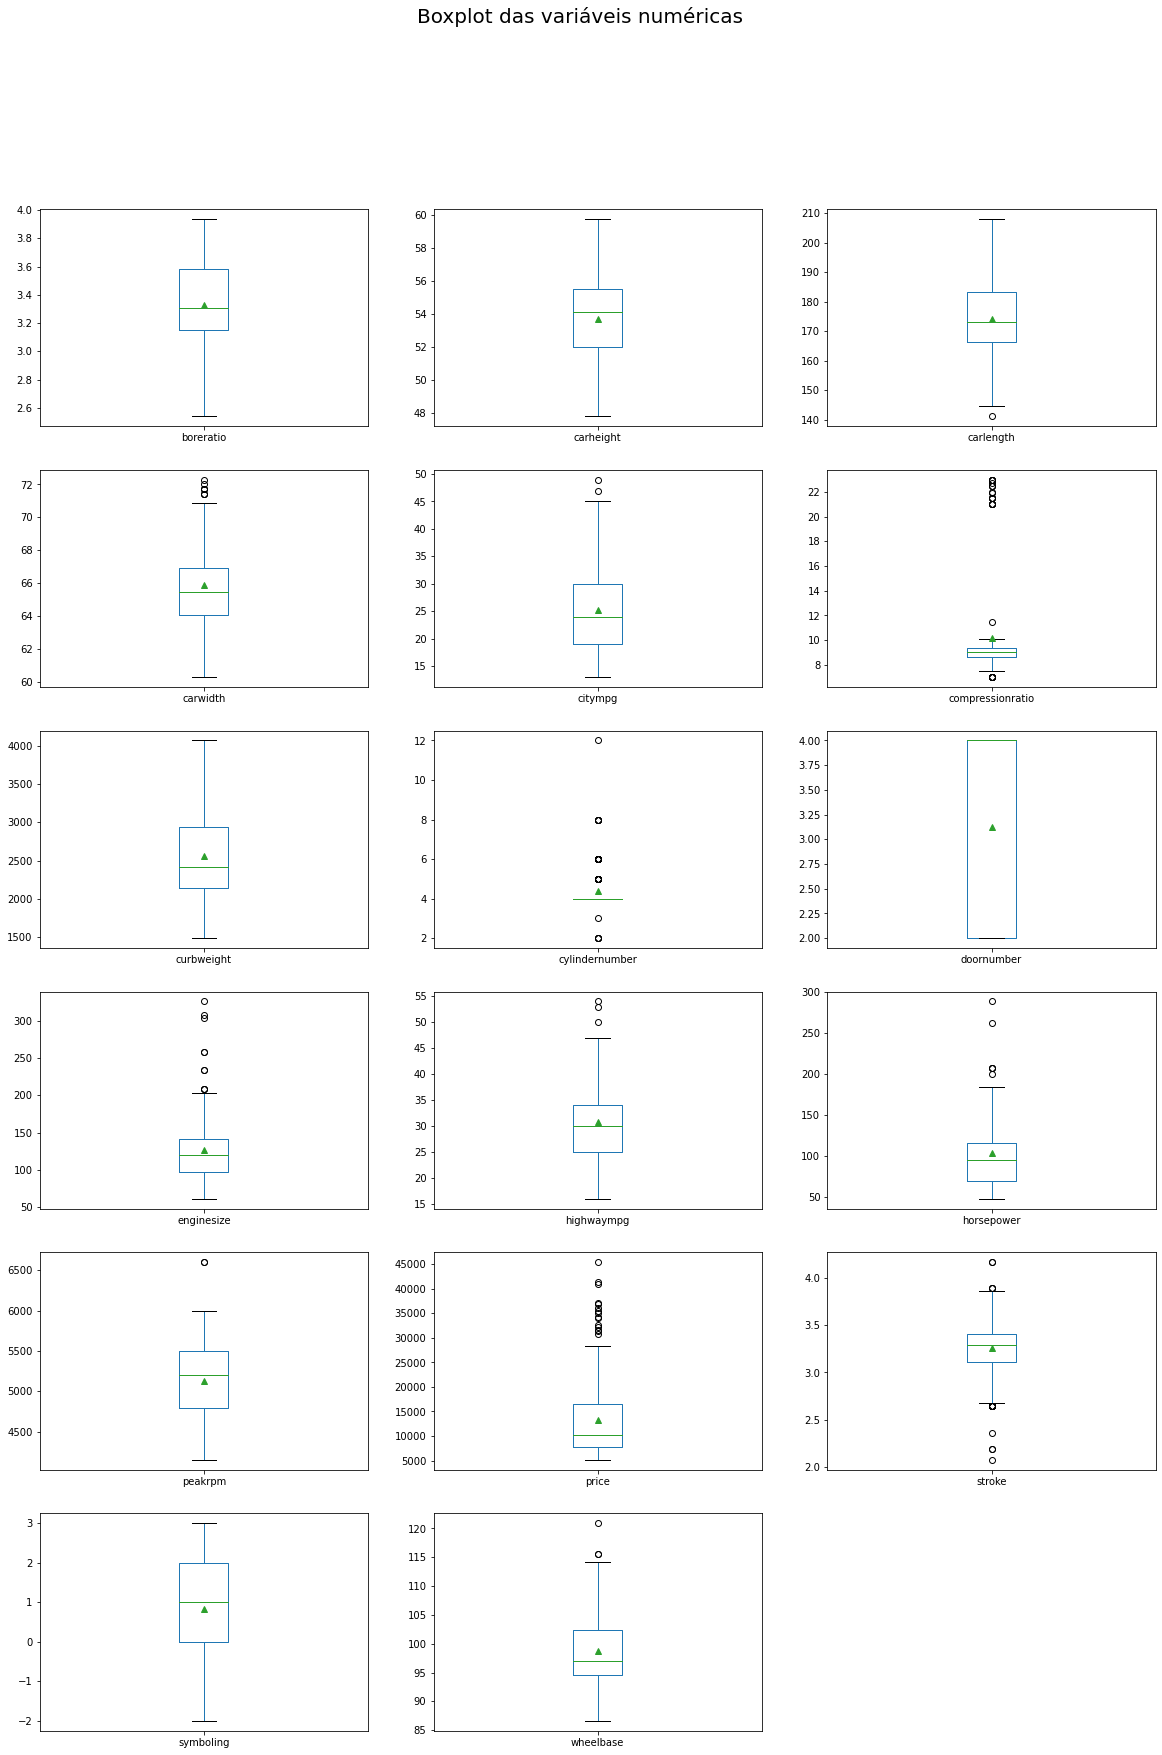

In [14]:
nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 28))

fig.suptitle('Boxplot das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado
            
            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            df.boxplot(column=numeric_vars[nv_index], grid=False,
            vert=True, showmeans=True, ax=axes[linha, coluna])
            
            nv_index -= 1
        else:
            plt.axis('off')

plt.show()

### 2.1.5 Executando o teste de normalidade pelo método Kolmogorov-Smirnov com as variáveis numéricas

In [15]:
nrm_test = list()

for var in numeric_vars:
    ks, pvalue = kstest(df[var], cdf = 'norm')
    nrm_test.append({
        'Variavel': var,
        'Estatistica KS': ks,
        'p-valor': pvalue
    })
    
print(*sorted(nrm_test, key=lambda x: x['Estatistica KS']), sep='\n')

{'Variavel': 'symboling', 'Estatistica KS': 0.39256425826366487, 'p-valor': 5.593612712180038e-29}
{'Variavel': 'doornumber', 'Estatistica KS': 0.9772498680518208, 'p-valor': 0.0}
{'Variavel': 'cylindernumber', 'Estatistica KS': 0.9791379068464187, 'p-valor': 0.0}
{'Variavel': 'stroke', 'Estatistica KS': 0.9808598328088434, 'p-valor': 0.0}
{'Variavel': 'boreratio', 'Estatistica KS': 0.9944573765569173, 'p-valor': 0.0}
{'Variavel': 'compressionratio', 'Estatistica KS': 0.9999999999987201, 'p-valor': 0.0}
{'Variavel': 'wheelbase', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'price', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'peakrpm', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'horsepower', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'highwaympg', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'enginesize', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'curbweight', 'Estatistica KS': 1.0, 'p-valor': 0.0}
{'Variavel': 'citympg', 'Estatistica K

### 2.1.6 Resultados da exploratória:

- Existem distribuições que chegam perto de serem normais nas variáveis numéricas, mas não o são. Visto os histogramas e os testes Kolmogorov.
- Existe presença de outliers em algumas variáveis, entretanto estes dizem respeito à características técnicas dos veículos registrados e são aceitáveis, eliminando a possibilidade de erro de digitação ou corrompimento dos dados.

### 2.1.7 Verificando correlação entre variáveis numéricas.

In [16]:
df.select_dtypes(include='number').corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


## 2.2 Analisando variáveis categóricas

### 2.2.1 Criando um array com as variáveis categóricas

In [17]:
category_variables = sorted(tuple(df.select_dtypes(include='category').columns))[::-1]
print(category_variables)

['fueltype', 'fuelsystem', 'enginetype', 'enginelocation', 'drivewheel', 'carbody', 'car_ID', 'aspiration', 'CarName']


### 2.2.2 Verificando a quantidade e as categorias possíveis em cada variável.

In [18]:
cat_info = list()
for cat in category_variables:
    cat_info.append({
        'Variavel': cat,
        'Qtd': len(df[cat].unique()),
        'Cats': tuple(df[cat].unique())[:15]
    })

print(*sorted(cat_info, key=lambda x: x['Qtd'], reverse=True), sep='\n')

{'Variavel': 'car_ID', 'Qtd': 205, 'Cats': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)}
{'Variavel': 'CarName', 'Qtd': 147, 'Cats': ('alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5')}
{'Variavel': 'fuelsystem', 'Qtd': 8, 'Cats': ('mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi')}
{'Variavel': 'enginetype', 'Qtd': 7, 'Cats': ('dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv')}
{'Variavel': 'carbody', 'Qtd': 5, 'Cats': ('convertible', 'hatchback', 'sedan', 'wagon', 'hardtop')}
{'Variavel': 'drivewheel', 'Qtd': 3, 'Cats': ('rwd', 'fwd', '4wd')}
{'Variavel': 'fueltype', 'Qtd': 2, 'Cats': ('gas', 'diesel')}
{'Variavel': 'enginelocation', 'Qtd': 2, 'Cats': ('front', 'rear')}
{'Variavel': 'aspiration', 'Qtd': 2, 'Cats': ('std', 'turbo')}


- A variável car_ID é apenas uma identificação do registro do carro no banco de dados, podendo ser desprezada.
- CarName possui 147 registros distintos que consistem em montadora + modelo. Sendo extremamente interessante separá-los para que a análise de montadora e modelo possa ser feita separadamente pelo modelo preditivo de preço.
- Demais variáveis dizem respeito à características técnicas dos carros.

### 2.2.3 Analisando variável CarName

In [19]:
print(*sorted(tuple(df['CarName'].unique())), sep=', ')

Nissan versa, alfa-romero Quadrifoglio, alfa-romero giulia, alfa-romero stelvio, audi 100 ls, audi 100ls, audi 4000, audi 5000, audi 5000s (diesel), audi fox, bmw 320i, bmw x1, bmw x3, bmw x4, bmw x5, bmw z4, buick century, buick century luxus (sw), buick century special, buick electra 225 custom, buick opel isuzu deluxe, buick regal sport coupe (turbo), buick skyhawk, buick skylark, chevrolet impala, chevrolet monte carlo, chevrolet vega 2300, dodge challenger se, dodge colt (sw), dodge colt hardtop, dodge coronet custom, dodge coronet custom (sw), dodge d200, dodge dart custom, dodge monaco (sw), dodge rampage, honda accord, honda accord cvcc, honda accord lx, honda civic, honda civic (auto), honda civic 1300, honda civic 1500 gl, honda civic cvcc, honda prelude, isuzu D-Max , isuzu D-Max V-Cross, isuzu MU-X, jaguar xf, jaguar xj, jaguar xk, maxda glc deluxe, maxda rx3, mazda 626, mazda glc, mazda glc 4, mazda glc custom, mazda glc custom l, mazda glc deluxe, mazda rx-4, mazda rx-7 g

# 3.0 Processamento dos dados

## 3.1 Criando um DataFrame vazio para receber dados processados

In [20]:
dfProc = pd.DataFrame()

## 3.2 Processando variáveis categóricas

### 3.2.1 CarName

- Se faz necessário separar o nome das montadoras dos modelos criando duas variáveis distintas a partir de uma.

In [21]:
#Definindo uma função para pegar o nome das montadoras.
def brand_getter(car_name):
    return car_name.split()[0].title()


#Definindo uma função para pegar o modelo dos veículos.
def model_getter(car_name):
    return '' + ' '.join(car_name.split()[1:]).title()

#Criando um DataFrame para receber apenas as novas features.
CarNames = pd.DataFrame()

#Preenchendo as duas colunas do DataFrame criado
CarNames['brand'] = df['CarName'].apply(brand_getter)
CarNames['model'] = df['CarName'].apply(model_getter)

#Corrigindo nomes de montadoras digitados errados
CarNames['brand'].replace({
    'Alfa-Romero': 'Alfa-Romeo',
    'Maxda': 'Mazda',
    'Vokswagen': 'Volkswagen',
    'Porcshce': 'Porsche',
    'Toyouta' : 'Toyota',
    'Vw': 'Volkswagen'
}, inplace=True)

#Corrigindo nome de Modelos
CarNames['model'].replace({
    '100 Ls': '100Ls'
}, inplace=True)

### 3.2.2 Reunindo as variáveis categóricas em um único DataFrame

In [22]:
#Criando um DF para apenas variáveis categóricas.
dfCateg = pd.DataFrame()

In [23]:
#Juntando as categorias num único DF e removendo a categoria model.
dfCateg = pd.concat([CarNames.drop('model', axis=1), df['fuelsystem'], df['enginetype'],
                     df['carbody'], df['drivewheel'], df['fueltype'], 
                     df['enginelocation'], df['aspiration']], axis = 1)

In [24]:
dfCateg.head()

,brand,fuelsystem,enginetype,carbody,drivewheel,fueltype,enginelocation,aspiration
0,Alfa-Romeo,mpfi,dohc,convertible,rwd,gas,front,std
1,Alfa-Romeo,mpfi,dohc,convertible,rwd,gas,front,std
2,Alfa-Romeo,mpfi,ohcv,hatchback,rwd,gas,front,std
3,Audi,mpfi,ohc,sedan,fwd,gas,front,std
4,Audi,mpfi,ohc,sedan,4wd,gas,front,std


### 3.2.3 One-Hot Encoding

In [25]:
prefixes = ['brd', 'fs', 'et', 'cb', 'dw', 'ft', 'el', 'ra']
dfCategRdy = pd.get_dummies(data=dfCateg, prefix=prefixes, prefix_sep='_', drop_first=True)

dfCategRdy.head()

,brd_Audi,brd_Bmw,brd_Buick,brd_Chevrolet,brd_Dodge,brd_Honda,brd_Isuzu,brd_Jaguar,brd_Mazda,brd_Mercury,...,et_rotor,cb_hardtop,cb_hatchback,cb_sedan,cb_wagon,dw_fwd,dw_rwd,ft_gas,el_rear,ra_turbo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### 3.2.4 Juntando as variáveis categóricas ao DataFrame de processados

In [26]:
dfProc = pd.concat([dfCategRdy], axis = 1)

dfProc.head()

,brd_Audi,brd_Bmw,brd_Buick,brd_Chevrolet,brd_Dodge,brd_Honda,brd_Isuzu,brd_Jaguar,brd_Mazda,brd_Mercury,...,et_rotor,cb_hardtop,cb_hatchback,cb_sedan,cb_wagon,dw_fwd,dw_rwd,ft_gas,el_rear,ra_turbo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## 3.3 Processamento de variáveis numéricas

### 3.3.1 Separando as variáveis independentes da dependente

In [27]:
tgt = df['price'][:] #Separando a variável target
indVar = df.select_dtypes(include='number').drop(['price', 'symboling'], axis=1)[:] #symboling retirado pois já está muito pŕoximo da normal.

In [28]:
indVar.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


### 3.3.2 Normalizando as variáveis numéricas.

In [29]:
indVarNorm = zscore(indVar, axis=1, ddof=1)

indVarNorm = pd.concat([df['symboling'], indVarNorm], axis=1)
indVarNorm.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,-0.393193,-0.330894,-0.273199,-0.348519,-0.359526,1.438379,-0.391755,-0.301111,-0.392136,-0.392704,-0.388158,-0.314780,3.202329,-0.379525,-0.375209
1,3,-0.393193,-0.330894,-0.273199,-0.348519,-0.359526,1.438379,-0.391755,-0.301111,-0.392136,-0.392704,-0.388158,-0.314780,3.202329,-0.379525,-0.375209
2,1,-0.401982,-0.336754,-0.282668,-0.357204,-0.366442,1.587303,-0.399162,-0.296207,-0.401503,-0.400946,-0.397046,-0.294796,3.122459,-0.389995,-0.385058
3,2,-0.379540,-0.315099,-0.263438,-0.337700,-0.345705,1.189789,-0.379540,-0.308910,-0.380085,-0.379944,-0.375504,-0.313619,3.317432,-0.366087,-0.362051
4,2,-0.390538,-0.328272,-0.277884,-0.349810,-0.357708,1.450045,-0.389886,-0.304383,-0.391067,-0.390930,-0.387927,-0.318090,3.196640,-0.381401,-0.378790


### 3.3.3 Renomeando as variáveis

In [30]:
indVarNorm = indVarNorm.rename(columns={
    'symboling': 'sym',
    'doornumber': 'dn',
    'wheelbase': 'wb',
    'carlength': 'cl',
    'carwidth': 'cw',
    'carheight': 'ch',
    'curbweight': 'curw',
    'cylindernumber': 'cyn',
    'enginesize': 'es',
    'boreratio': 'brat',
    'stroke': 'stk',
    'compressionratio': 'crat',
    'horsepower': 'hp',
    'peakrpm': 'mrpm',
    'citympg': 'cmpg',
    'highwaympg': 'hmpg'
})

indVarNorm.head()

,sym,dn,wb,cl,cw,ch,curw,cyn,es,brat,stk,crat,hp,mrpm,cmpg,hmpg
0,3,-0.393193,-0.330894,-0.273199,-0.348519,-0.359526,1.438379,-0.391755,-0.301111,-0.392136,-0.392704,-0.388158,-0.314780,3.202329,-0.379525,-0.375209
1,3,-0.393193,-0.330894,-0.273199,-0.348519,-0.359526,1.438379,-0.391755,-0.301111,-0.392136,-0.392704,-0.388158,-0.314780,3.202329,-0.379525,-0.375209
2,1,-0.401982,-0.336754,-0.282668,-0.357204,-0.366442,1.587303,-0.399162,-0.296207,-0.401503,-0.400946,-0.397046,-0.294796,3.122459,-0.389995,-0.385058
3,2,-0.379540,-0.315099,-0.263438,-0.337700,-0.345705,1.189789,-0.379540,-0.308910,-0.380085,-0.379944,-0.375504,-0.313619,3.317432,-0.366087,-0.362051
4,2,-0.390538,-0.328272,-0.277884,-0.349810,-0.357708,1.450045,-0.389886,-0.304383,-0.391067,-0.390930,-0.387927,-0.318090,3.196640,-0.381401,-0.378790


### 3.3.4 Reunindo as variáveis númericas com as categóricas

In [31]:
dfProc = pd.concat([pd.Series(np.ones(shape=(205)), name='itc'), dfProc, indVarNorm], axis = 1)

dfProc.head()

,itc,brd_Audi,brd_Bmw,brd_Buick,brd_Chevrolet,brd_Dodge,brd_Honda,brd_Isuzu,brd_Jaguar,brd_Mazda,...,curw,cyn,es,brat,stk,crat,hp,mrpm,cmpg,hmpg
0,1.0,0,0,0,0,0,0,0,0,0,...,1.438379,-0.391755,-0.301111,-0.392136,-0.392704,-0.388158,-0.314780,3.202329,-0.379525,-0.375209
1,1.0,0,0,0,0,0,0,0,0,0,...,1.438379,-0.391755,-0.301111,-0.392136,-0.392704,-0.388158,-0.314780,3.202329,-0.379525,-0.375209
2,1.0,0,0,0,0,0,0,0,0,0,...,1.587303,-0.399162,-0.296207,-0.401503,-0.400946,-0.397046,-0.294796,3.122459,-0.389995,-0.385058
3,1.0,1,0,0,0,0,0,0,0,0,...,1.189789,-0.379540,-0.308910,-0.380085,-0.379944,-0.375504,-0.313619,3.317432,-0.366087,-0.362051
4,1.0,1,0,0,0,0,0,0,0,0,...,1.450045,-0.389886,-0.304383,-0.391067,-0.390930,-0.387927,-0.318090,3.196640,-0.381401,-0.378790


# 4.0 Modelagem Ordinary Least Squares

### 4.0.1 Separando os conjuntos de treino e teste

In [32]:
xTrain, xTest, yTrain, yTest = train_test_split(dfProc.drop(['fs_mpfi','cb_sedan', 
                            'dw_rwd', 'brd_Toyota', 'brd_Buick', 'brd_Porsche', 'et_ohc',
                            'ra_turbo', 'dw_fwd', 'fs_2bbl', 'et_ohcv', 'brd_Dodge', 
                            'brd_Honda', 'brd_Mazda', 'brd_Mitsubishi'
                            ], axis=1), tgt, test_size=0.2, random_state=1)

## 4.1 Treinamento do modelo

In [33]:
reg = OLS(yTrain, xTrain).fit()

In [34]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     45.36
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           8.82e-57
Time:                        13:29:27   Log-Likelihood:                -1487.3
No. Observations:                 164   AIC:                             3053.
Df Residuals:                     125   BIC:                             3173.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
itc             1.066e+05   3.21e+04      3.

### 4.1.1 Verificando o VIF (Variance Inflation Factor)

In [35]:
VIF = pd.DataFrame({'Variáveis': xTrain.columns[1:],
              'VIF': [variance_inflation_factor(xTrain.values, i + 1)
                       for i in range(len(xTrain.columns[1:]))]})

VIF.T

/home/marcocruz/conda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/marcocruz/conda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Variáveis,brd_Audi,brd_Bmw,brd_Chevrolet,brd_Isuzu,brd_Jaguar,brd_Mercury,brd_Nissan,brd_Peugeot,brd_Plymouth,brd_Renault,...,curw,cyn,es,brat,stk,crat,hp,mrpm,cmpg,hmpg
VIF,1.544113,1.537076,1.170015,1.627331,1.842539,1.338112,1.465867,inf,1.113658,1.211588,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


### 4.1.2 Verificação dos resíduos

In [36]:
pred = pd.concat([yTest, reg.predict(xTest)], axis = 1)
pred.columns = ['Real', 'Previsto']

pred['Residuo'] = pred['Real'] - pred['Previsto']

pred

,Real,Previsto,Residuo
78,6669.0,7460.999228,-791.999228
97,7999.0,4708.290571,3290.709429
151,6338.0,6324.644639,13.355361
44,8916.5,6344.205177,2572.294823
40,10295.0,8027.935373,2267.064627
67,25552.0,28225.369641,-2673.369641
98,8249.0,5855.914959,2393.085041
18,5151.0,-1226.874677,6377.874677
152,6488.0,7186.372572,-698.372572
62,10245.0,10690.230431,-445.230431


### 4.1.3 Verificação da normalidade dos resíduos

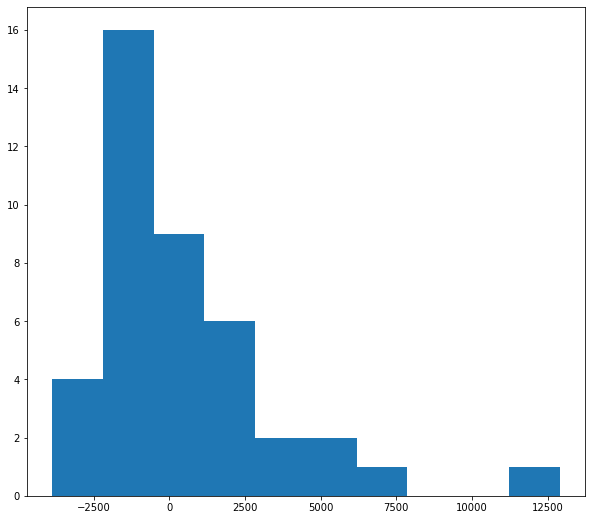

In [37]:
#distribuição dos resíduos.
fig = plt.figure(figsize=(10,9))

plt.hist(pred['Residuo'])

plt.show()

In [38]:
kStat, kPvalue = kstest(pred['Residuo'], 'norm')

print(kStat, kPvalue, sep='\n')

0.5609756097560976
1.0855898494490383e-12


- Resíduos próximos da normal

### 4.1.4 Verificando homocedasticidade

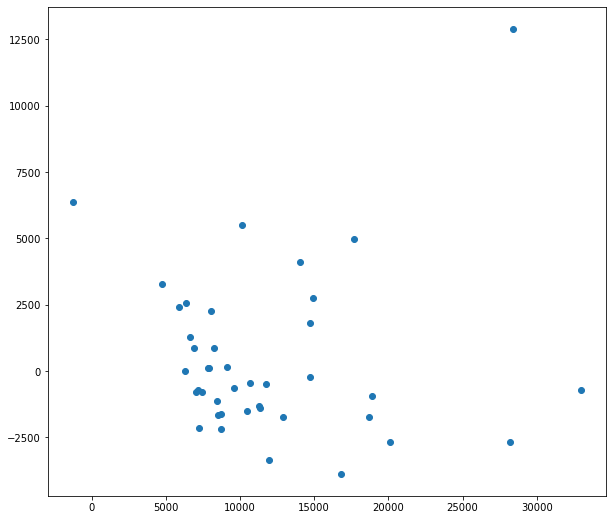

In [39]:
#Homocedasticidade
fig = plt.figure(figsize=(10,9))

plt.scatter(pred['Previsto'], pred['Residuo'])

plt.show()

- Distribuição próxima da homocedasticidade, com raros picos.

### 4.1.5 Verificação do R quadrado e RMSE

In [40]:
#Calculando o R Square Gradiente Descendente
print('R_sq', r2_score(pred['Real'], pred['Previsto']))

#Calculando o Root Mean Squared Error Gradiente Descendente
print('RMSE', np.sqrt(mean_squared_error(pred['Real'], pred['Previsto'])))

R_sq 0.8253121919902031
RMSE 3098.255505192979


- Raiz do erro médio em 3100, o modelo explica 82% dos casos no conjunto de teste.

# 5.0 Modelando Decision Tree

### 5.0.1 Separando novamente os datasets em treino e teste

In [41]:
xTrain, xTest, yTrain, yTest = train_test_split(dfProc, tgt, test_size=0.2, random_state=3)

In [42]:
xTrain.head()

,itc,brd_Audi,brd_Bmw,brd_Buick,brd_Chevrolet,brd_Dodge,brd_Honda,brd_Isuzu,brd_Jaguar,brd_Mazda,...,curw,cyn,es,brat,stk,crat,hp,mrpm,cmpg,hmpg
135,1.0,0,0,0,0,0,0,0,0,0,...,1.482498,-0.393226,-0.313538,-0.393539,-0.393859,-0.389616,-0.321030,3.179777,-0.381647,-0.376880
134,1.0,0,0,0,0,0,0,0,0,0,...,1.455453,-0.392128,-0.312155,-0.393126,-0.393447,-0.388505,-0.319674,3.193670,-0.380508,-0.375723
41,1.0,0,0,0,0,0,1,0,0,0,...,1.191238,-0.377485,-0.309917,-0.378027,-0.377753,-0.374298,-0.315654,3.317076,-0.364736,-0.362186
161,1.0,0,0,0,0,0,0,0,0,0,...,1.241271,-0.383209,-0.311112,-0.383830,-0.383952,-0.379374,-0.332587,3.295264,-0.364801,-0.360199
159,1.0,0,0,0,0,0,0,0,0,0,...,1.425644,-0.394434,-0.309481,-0.395019,-0.394955,-0.379607,-0.352759,3.208855,-0.367185,-0.359972


## 5.1 Treinando o modelo

In [43]:
regTree = DecisionTreeRegressor(criterion='squared_error').fit(xTrain, yTrain)

### 5.1.1 Verificando R quadrado do modelo treinado com os conjuntos de teste

In [44]:
regTree.score(xTest,yTest)

0.9047126542102536

- Eficiência de 90%

### 5.1.2 Verificando resíduos

In [45]:
previsto = pd.Series(regTree.predict(xTest), name='Previsto')
pred = pd.concat([yTest.reset_index().drop('index', axis =1), previsto], axis = 1)
pred.columns = ['Real', 'Previsto']

pred['Residuo'] = pred['Real'] - pred['Previsto']

pred

,Real,Previsto,Residuo
0,11595.0,11694.000,-99.000
1,7975.0,8195.000,-220.000
2,5572.0,5389.000,183.000
3,9298.0,9538.000,-240.000
4,7738.0,8058.000,-320.000
5,31600.0,25552.000,6048.000
6,8948.0,9988.000,-1040.000
7,7898.0,6918.000,980.000
8,6692.0,7609.000,-917.000
9,34184.0,30760.000,3424.000


### 5.1.3 Verificando a normalidade dos resíduos

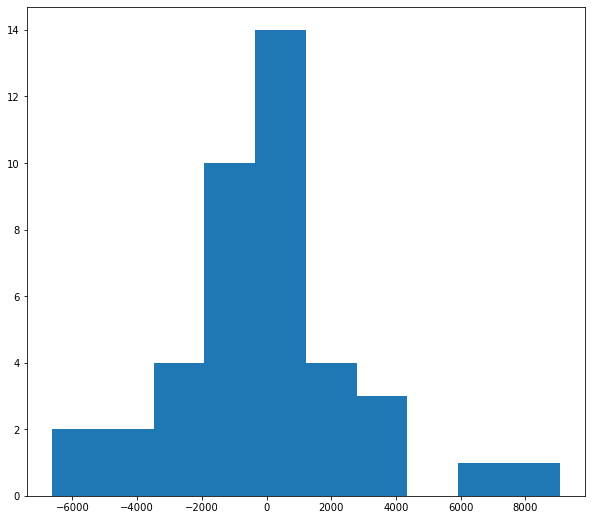

In [46]:
#distribuição dos resíduos.
fig = plt.figure(figsize=(10,9))

plt.hist(pred['Residuo'])

plt.show()

In [47]:
kStat, kPvalue = kstest(pred['Residuo'], 'norm')

print(kStat, kPvalue, sep='\n')

0.6097560975609756
3.650236815193179e-15


- Resíduos mais próximos do normal do que no método OLS

### 5.1.4 Testando Homocedasticidade

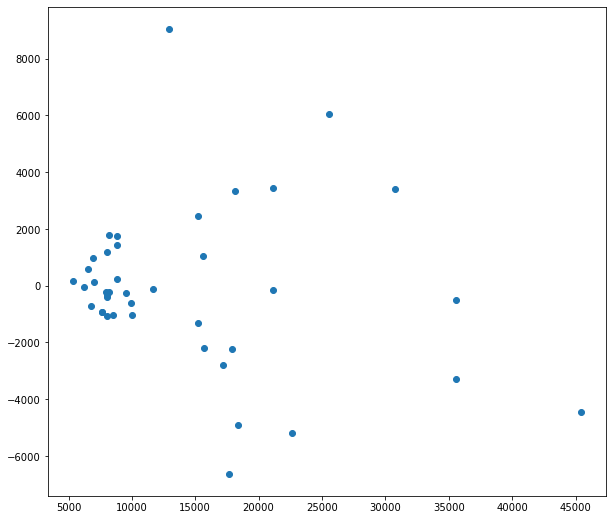

In [48]:
fig = plt.figure(figsize=(10,9))

plt.scatter(pred['Previsto'], pred['Residuo'])

plt.show()

- Resíduos entre -4000 e 4000 em sua maioria

In [49]:
print('R_sq ', regTree.score(xTest,yTest), '\nRMSE ', np.sqrt(mean_squared_error(pred['Real'], pred['Previsto'])))

R_sq  0.9047126542102536 
RMSE  2805.7646169022637
